In [ ]:
np.random.seed(19680801)

In [ ]:
# Part 1
# Andrew French - 11147452

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

def part1():

    datasets = {"iris": load_iris(), "breast cancer":load_breast_cancer(), "digits": load_digits()}

    print("-------------------------------------------")

    for key in datasets.keys():
        dataset = datasets[key]

        print("Training the", key, "dataset...")

        # Split the data in training and testing sets
        print("Test = 40% - Train = 60%")
        X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.4, random_state=0)

        #Loop with different depths - 1 to 10
        dataframe = pd.DataFrame(columns=['Depth', 'Avg # of Nodes', 'Accuracy'])
        clf = tree.DecisionTreeClassifier()
        for depth in range(1, 16):

            clf = tree.DecisionTreeClassifier(max_depth=depth)
            clf = clf.fit(X_train, y_train)
            scores = cross_val_score(clf, dataset.data, dataset.target, cv=8)
            #Unsure if the avg # of nodes is correct
            dataframe.loc[depth] = [clf.get_depth(), clf.tree_.node_count/8, "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)]

        print(dataframe)

        # Select the best value of hyper-parameter and then use the entire training data to build a classifier. 
        best_value = clf.get_depth()
        print("The best value for the depth hyper-parameter is", best_value)

        # Report the number of nodes and the accuracy of the classifier on the test set.
        print("Testing the", key, "dataset with test data and with hyper-parameter...")
        clf = tree.DecisionTreeClassifier(max_depth=best_value)
        clf = clf.fit(X_test, y_test)
        scores = cross_val_score(clf, dataset.data, dataset.target, cv=8)
        # Again not sure if number of nodes is correct
        print("Number of nodes:", clf.tree_.node_count/8)
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

        print("---------------------------------------------------")
        
part1()

Fitting the classifer...
Plotting the decision boundary...
Putting the result into a color plot...
Plotting the training points...
Showing the plot:


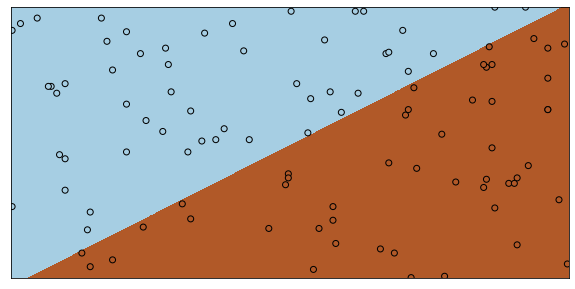

Test = 40% - Train = 60%


In [4]:
# Part 2

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

def part2():
    
    # Part 1.1
    
    X = np.random.randint(low=-100, high=100, size=(100, 2))
    Y = list(map(lambda x: 1 if x[0] > x[1] else 0, X))
    
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

    # Create an instance of Logistic Regression Classifier and fit the data.
    print("Fitting the classifer...")
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    print("Plotting the decision boundary...")
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    print("Putting the result into a color plot...")
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10,5))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    print("Plotting the training points...")
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    print("Showing the plot:")
    plt.show()
    
    
    # Split the data in training and testing sets
    print("Test = 40% - Train = 60%")
#     X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.4, random_state=0)

    


# Current Running Part
part2()
    

In [ ]:
# Part 3

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

def part3():
    # Reading the file, latin encoding is used to avoid some errors
    data = pd.read_csv('assignment1-2019-data.csv', encoding=('latin'), quoting=3)

    # Creating the list of input and output variables.

    inputVariables=list(data)
    del inputVariables[4]
    outputVariables=list(data)[4]
    inputData=data[inputVariables]
    
    # Dummy variable work
    for column in inputData.columns:
        if inputData[column].dtype==object:
            dummyCols=pd.get_dummies(inputData[column])
            inputData=inputData.join(dummyCols)
            del inputData[column]
    
    
    # Iterate through A, B, C -> and create three different models for each set
    for i in range(1, 4):
        variables = list(inputData)
        new_variables = variables[:3] + list(variables[2 + i])
        updatedInputData = inputData[new_variables]
        
        # Fit to the model    

        model_1=LinearRegression()
        model_1.fit(updatedInputData, data[outputVariables])
        print("Mean squared error:", np.mean((model_1.predict(updatedInputData) - data[outputVariables]) ** 2))
        print("R²:", model_1.score(updatedInputData, data[outputVariables]))

        # Round the coefficients of the learned model to integers and 
        # write a casebased definition of the functions identified by the regression model(s).
        coefficients = model_1.coef_
        rounded_coefficients = list(map(lambda x: round(x), coefficients))
        print("Rounded coefficients:", rounded_coefficients)
        
part3()

In [ ]:
# Question 3 -> Part 3
## Depending on the method you used for regression, describe how a new
##    (unseen) data point (an input vector of size 4) can be assigned a predicted
##     value.

If you......
Does this mean the input is like this -> (x1, x2, x, x4)
Or, is it like a new x5 that has (A, B, C, D) categories??